In [0]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import io
plt.style.use("ggplot")

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import files
uploaded = files.upload()

Saving NY property data.csv to NY property data.csv


In [0]:
#Read Data
NYPropertyData = pd.read_csv(io.StringIO(uploaded['NY property data.csv'].decode('utf-8')))

In [0]:
#Convert to categorical
NYPropertyData['ZIP'] = NYPropertyData['ZIP'].astype('object')
NYPropertyData['EXCD1'] = NYPropertyData['EXCD1'].astype('object')
NYPropertyData['EXCD2'] = NYPropertyData['EXCD2'].astype('object')
NYPropertyData['B'] = NYPropertyData['B'].astype('object')

In [0]:
#Summary
SummaryStat = pd.DataFrame(NYPropertyData.describe())
SummaryStat

,RECORD,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2
count,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,1014730.000,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,1070994.000,282726.000,282732.000,87449.000,130828.000
mean,535497.500,4757.239,364.722,36.635,88.862,5.007,874264.505,85067.919,227238.169,36423.891,91186.982,23.043,39.923,246235.719,713911.436,351235.684,656768.282
std,309169.481,3676.579,853.215,74.033,76.396,8.366,11582430.991,4057260.056,6877529.306,3981575.791,6508402.819,35.580,42.707,6178962.564,11652528.948,10802212.672,16072510.172
min,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,3.000,1.000,7.000
25%,267749.250,1555.000,23.000,19.000,80.000,2.000,304000.000,9180.000,18374.000,0.000,0.000,15.000,26.000,5705.000,33912.000,2090.000,2870.000
50%,535497.500,4047.000,49.000,25.000,100.000,2.000,447000.000,13678.000,25340.000,1620.000,1620.000,20.000,39.000,20145.000,79962.500,3048.000,37062.000
75%,803245.750,6898.000,143.000,40.000,100.000,3.000,619000.000,19740.000,45438.000,1620.000,2090.000,24.000,50.000,62640.000,240551.000,31779.000,106840.750
max,1070994.000,16350.000,9978.000,9999.000,9999.000,119.000,6150000000.000,2668500000.000,4668308947.000,2668500000.000,4668308947.000,7575.000,9393.000,2371005000.000,4501180002.000,2371005000.000,4501180002.000


In [0]:
#Count missing values
MissingValueCountDF = pd.DataFrame(NYPropertyData.isnull().sum())
MissingValueCountDF

,0
RECORD,0
BBLE,0
B,0
BLOCK,0
LOT,0
EASEMENT,1066358
OWNER,31745
BLDGCL,0
TAXCLASS,0
LTFRONT,0


In [0]:
#Records that have a value
FilledRecords = NYPropertyData.count()
FilledRecords

RECORD      1070994
BBLE        1070994
B           1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [0]:
#Percent populated
NYPropertyData.count()
PercentPopulated = NYPropertyData.count()/(NYPropertyData.isnull().sum() + NYPropertyData.count())
PercentPopulated

RECORD     1.000
BBLE       1.000
B          1.000
BLOCK      1.000
LOT        1.000
EASEMENT   0.004
OWNER      0.970
BLDGCL     1.000
TAXCLASS   1.000
LTFRONT    1.000
LTDEPTH    1.000
EXT        0.331
STORIES    0.947
FULLVAL    1.000
AVLAND     1.000
AVTOT      1.000
EXLAND     1.000
EXTOT      1.000
EXCD1      0.596
STADDR     0.999
ZIP        0.972
EXMPTCL    0.015
BLDFRONT   1.000
BLDDEPTH   1.000
AVLAND2    0.264
AVTOT2     0.264
EXLAND2    0.082
EXTOT2     0.122
EXCD2      0.087
PERIOD     1.000
YEAR       1.000
VALTYPE    1.000
dtype: float64

In [0]:
#Count 0's
ZeroesDict = {}
for col in NYPropertyData.columns.tolist():
    ZeroesDict[col + "_zeroes"] = NYPropertyData[NYPropertyData[col] == 0].shape[0]
pd.DataFrame(ZeroesDict, index = [0])

,AVLAND2_zeroes,AVLAND_zeroes,AVTOT2_zeroes,AVTOT_zeroes,BBLE_zeroes,BLDDEPTH_zeroes,BLDFRONT_zeroes,BLDGCL_zeroes,BLOCK_zeroes,B_zeroes,EASEMENT_zeroes,EXCD1_zeroes,EXCD2_zeroes,EXLAND2_zeroes,EXLAND_zeroes,EXMPTCL_zeroes,EXTOT2_zeroes,EXTOT_zeroes,EXT_zeroes,FULLVAL_zeroes,LOT_zeroes,LTDEPTH_zeroes,LTFRONT_zeroes,OWNER_zeroes,PERIOD_zeroes,RECORD_zeroes,STADDR_zeroes,STORIES_zeroes,TAXCLASS_zeroes,VALTYPE_zeroes,YEAR_zeroes,ZIP_zeroes
0,0,13009,0,13007,0,228853,228815,0,0,0,0,0,0,0,491699,0,0,432572,0,13007,0,170128,169108,0,0,0,0,0,0,0,0,0


In [0]:
#Data types
NYPropertyDataDtypes = NYPropertyData.dtypes
NYPropertyDataDtypes


RECORD        int64
BBLE         object
B            object
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1        object
STADDR       object
ZIP          object
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2        object
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [0]:
#Find most frequent values of categorical variables
for col in NYPropertyData.columns.tolist()[1:]:
    if (DTypesDict[col] == 'object'):
        print ("Variable:", col)
        print (NYPropertyData[col].value_counts().sort_values(ascending = False).head(10))
        print ("-------------")

Variable: BBLE
2048670011    1
4089020052    1
2029850023    1
3011420083    1
3067730049    1
3039940132    1
3033500022    1
3066370068    1
1017201011    1
4031890022    1
Name: BBLE, dtype: int64
-------------
Variable: B
4    358046
3    323243
1    146220
5    136200
2    107285
Name: B, dtype: int64
-------------
Variable: EASEMENT
E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
L       3
P       3
Name: EASEMENT, dtype: int64
-------------
Variable: OWNER
PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
DEPT OF ENVIRONMENTAL    1166
BOARD OF EDUCATION       1015
NEW YORK CITY HOUSING    1014
CNY/NYCTA                 975
NYC HOUSING PARTNERSH     747
Name: OWNER, dtype: int64
-------------
Variable: BLDGCL
R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
C0     73111
B3     59240
A2     51130
A9     26177
B9     26133
Name: BLDGCL,

In [0]:
UniqueValuesDict = {}
for col in NYPropertyData.columns.tolist():
     UniqueValuesDict[col + "_unique"] = len(NYPropertyData[col].unique())
    
UniqueValuesDict

{'AVLAND2_unique': 58592,
 'AVLAND_unique': 70921,
 'AVTOT2_unique': 111361,
 'AVTOT_unique': 112914,
 'BBLE_unique': 1070994,
 'BLDDEPTH_unique': 621,
 'BLDFRONT_unique': 612,
 'BLDGCL_unique': 200,
 'BLOCK_unique': 13984,
 'B_unique': 5,
 'EASEMENT_unique': 13,
 'EXCD1_unique': 130,
 'EXCD2_unique': 61,
 'EXLAND2_unique': 22196,
 'EXLAND_unique': 33419,
 'EXMPTCL_unique': 15,
 'EXTOT2_unique': 48349,
 'EXTOT_unique': 64255,
 'EXT_unique': 4,
 'FULLVAL_unique': 109324,
 'LOT_unique': 6366,
 'LTDEPTH_unique': 1370,
 'LTFRONT_unique': 1297,
 'OWNER_unique': 863348,
 'PERIOD_unique': 1,
 'RECORD_unique': 1070994,
 'STADDR_unique': 839281,
 'STORIES_unique': 112,
 'TAXCLASS_unique': 11,
 'VALTYPE_unique': 1,
 'YEAR_unique': 1,
 'ZIP_unique': 197}

In [0]:
def WithoutOutliers(col):
    Dict = {}
    Upper = NYPropertyData[col].dropna().quantile(0.975)
    Lower = NYPropertyData[col].dropna().quantile(0.025)
    NewCol = NYPropertyData.loc[(NYPropertyData[col] <= Upper) & (NYPropertyData[col] >= Lower), col]
    Dict['NewCol'] = NewCol
    Dict['Records'] = round(NewCol.shape[0]*100/NYPropertyData[col].dropna().shape[0],2)
    return Dict

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


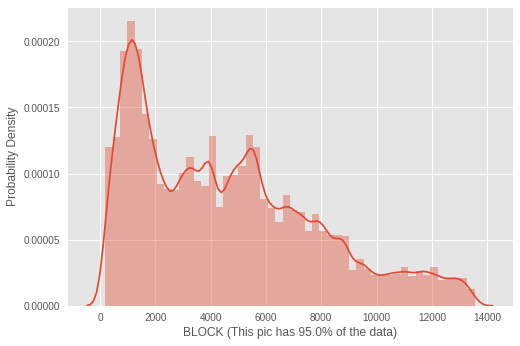

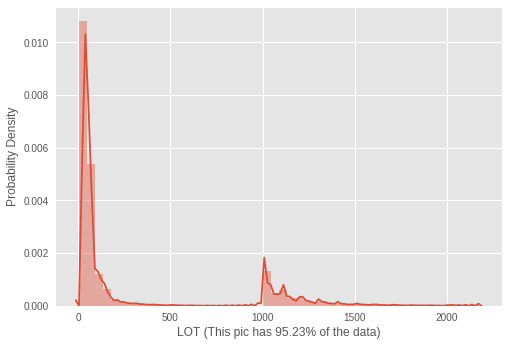

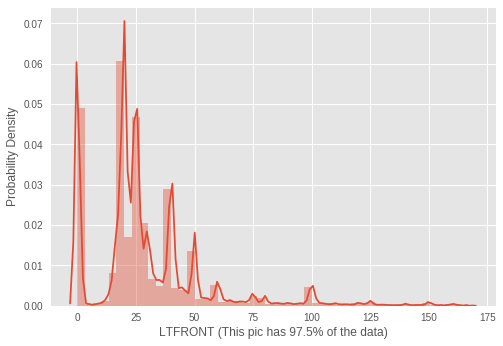

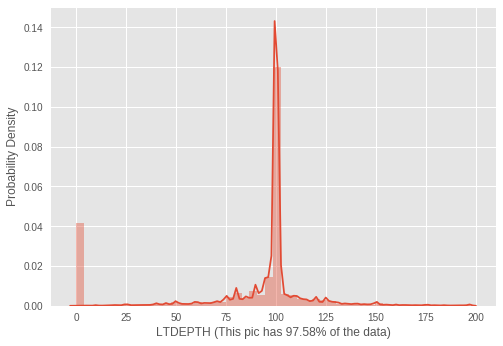

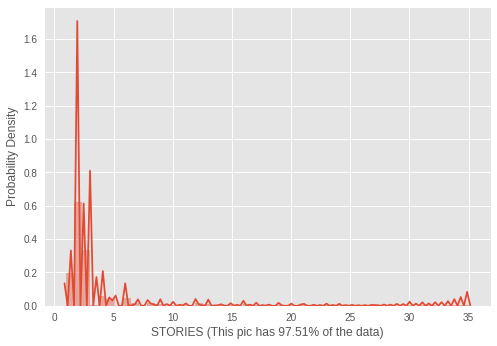

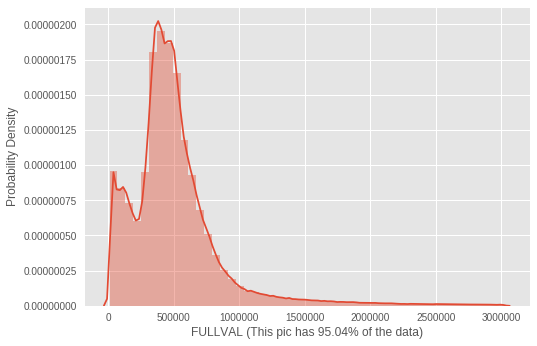

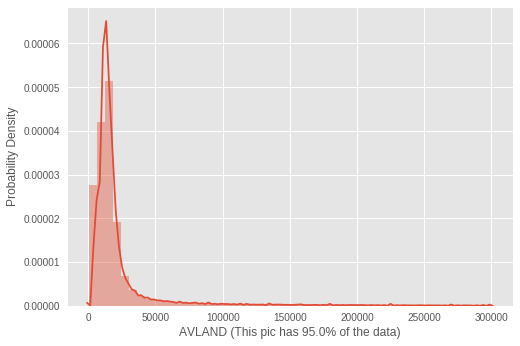

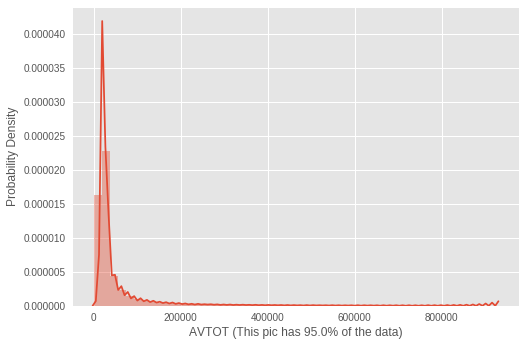

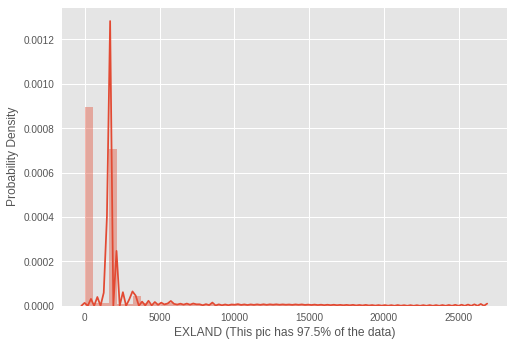

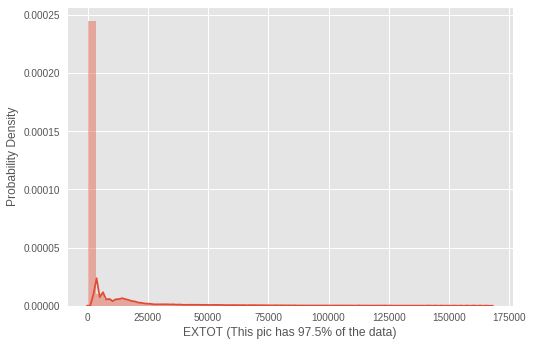

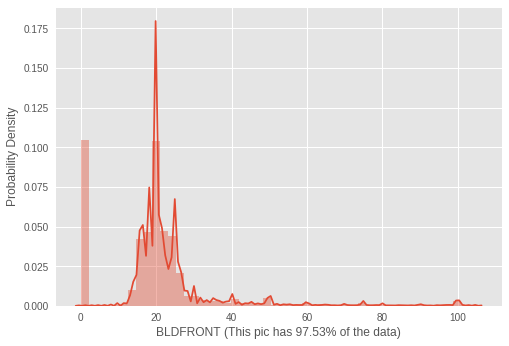

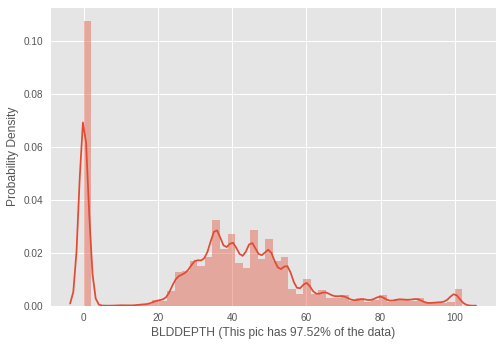

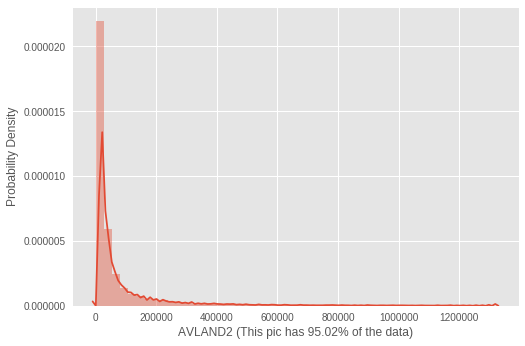

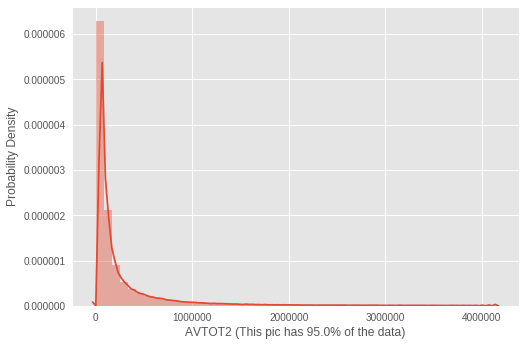

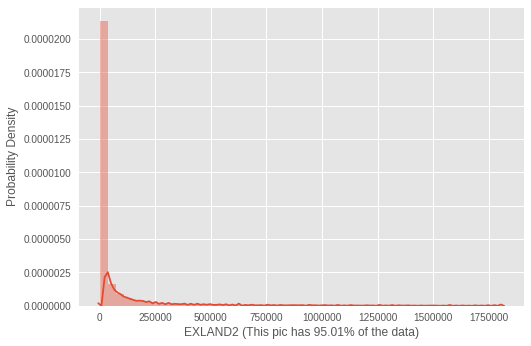

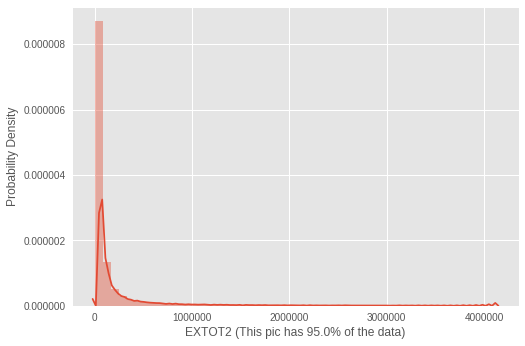

<Figure size 576x396 with 0 Axes>

In [0]:
#Plot numerical variables
for col in SummaryStat.columns.tolist()[1:]:
    Column = WithoutOutliers(col)
    sns.distplot(Column['NewCol'])
    #plt.title(col)
    #plt.figtext(0.5, 0.9, "No. records used - " + str(Column['Records']), horizontalalignment = 'right')
    plt.xlabel(col + " (This pic has " + str(Column['Records']) + "% of the data)")
    plt.ylabel('Probability Density')
    plt.show()
    plt.savefig('Distributions.png')

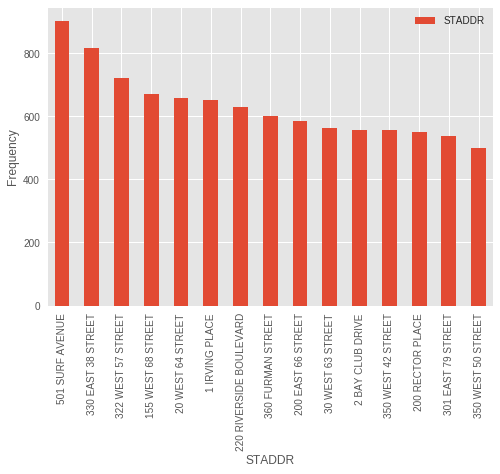

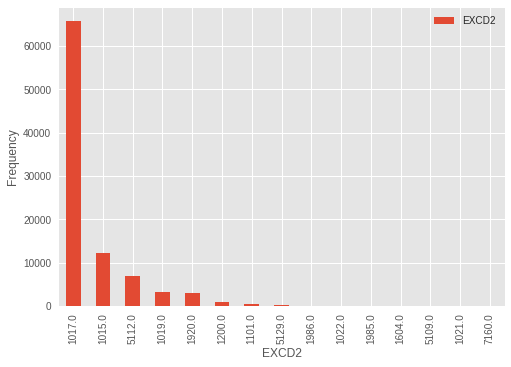

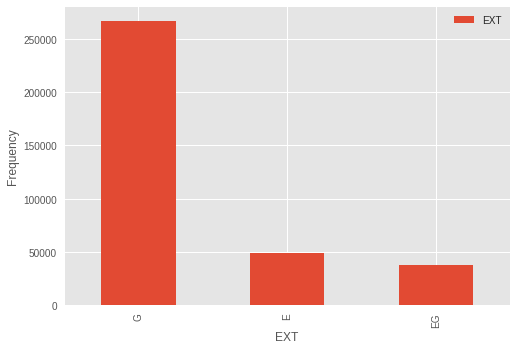

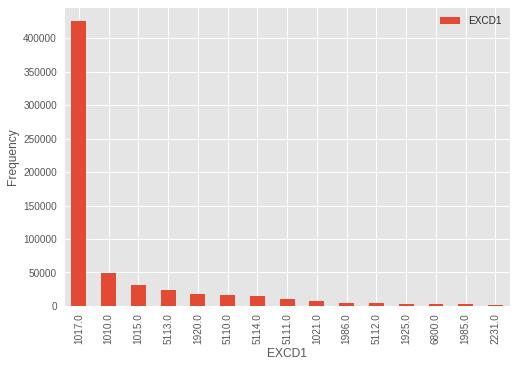

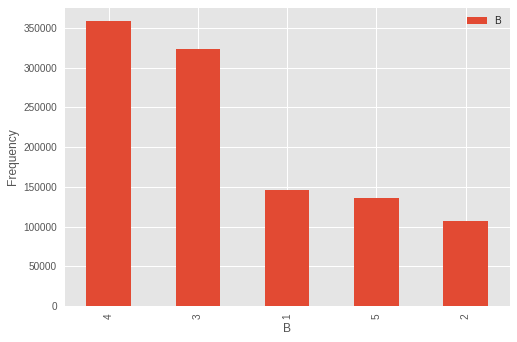

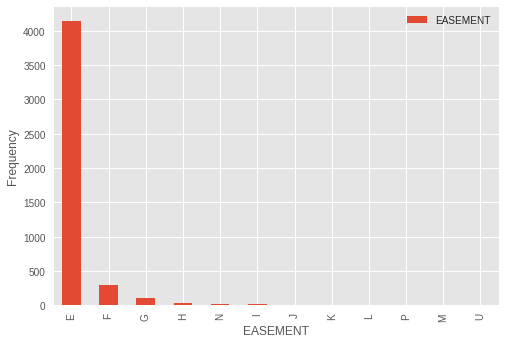

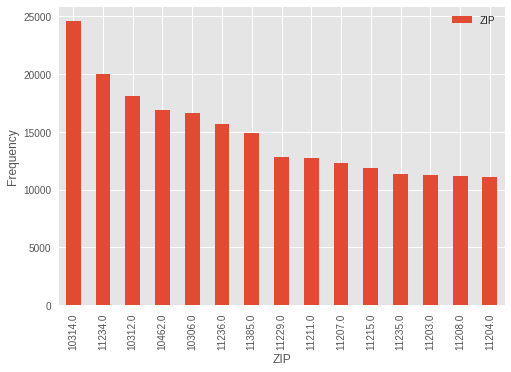

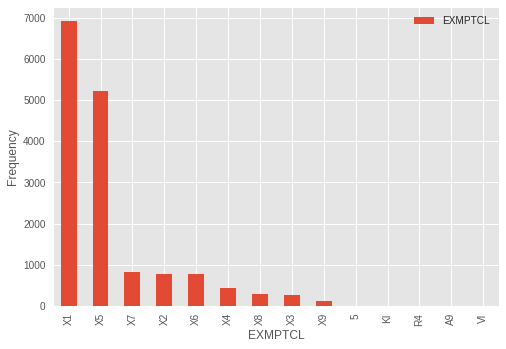

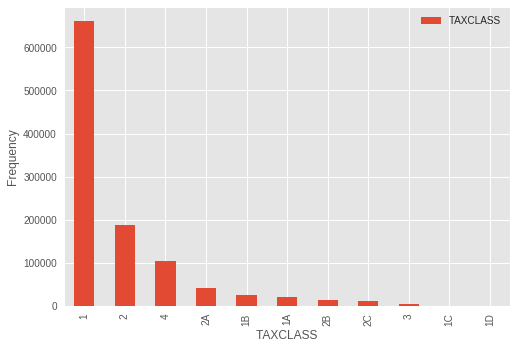

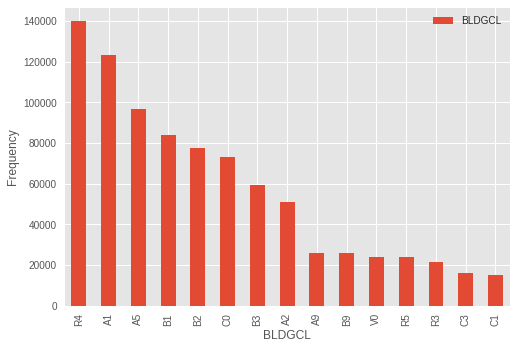

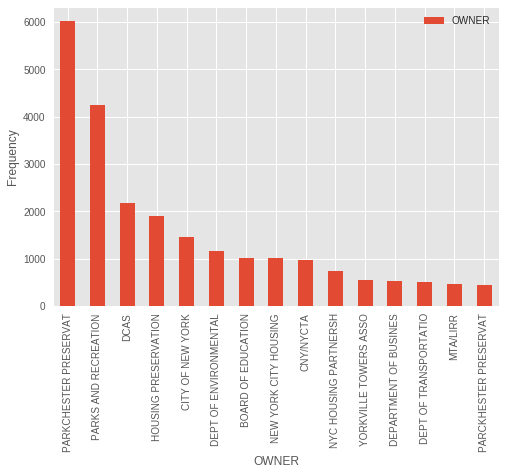

In [0]:
#Plot categorical variables
CategoricalVar = list(set(NYPropertyData.columns.tolist()) - set(SummaryStat.columns.tolist()))
for elem in ['BBLE', 'PERIOD', 'YEAR', 'VALTYPE']:
  CategoricalVar.remove(elem)
for col in CategoricalVar:
    DF = pd.DataFrame(NYPropertyData[col].value_counts().sort_values(ascending = False).head(15))
    DF.plot(kind = 'bar')
    #sns.barplot(x = DF.index, y = DF.iloc[:,0])
    plt.ylabel('Frequency')
    plt.xlabel(col)